# Poblaciones de un atomo de dos niveles

In [2]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
g = 1.0       # Tasa de detección
phi = 0.0         # Fase del oscilador local
t_max = 40
dt = 0.01# Tiempo total de simulación
tlist = np.linspace(0,200,1000)
Omega = 1      # Frecuencia de Rabi
steps = int(t_max / dt)
Delta =0.1
# Definimos los estados base y excitado para un sistema de dos niveles
Kg = qt.basis(2, 0)  # estado base |g⟩
Ke = qt.basis(2, 1)  # estado excitado |e⟩

## Espacio de hilbert

Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Age = Kg*Ke.dag()



expect_values = [
Agg,Aee] #Los valores esperados se ponen en forma de lista, no se si importe su orden


psi0=Kg
psi0 = (Kg + Ke).unit()
# Operadores cuánticos
sm = qt.destroy(2)   # Operador de aniquilación (sigma_-)
sp = sm.dag()        # Operador de creación (sigma_+)


sigma_z = Ke * Ke.dag() - Kg * Kg.dag()
# Hamiltoniano
H = 0.5 * Delta * qt.sigmaz()+0.5 * Omega * (sm + sp)  # Hamiltoniano con frecuencia de Rabi
Ceg = np.sqrt(g) * Kg * Ke.dag()
collapse = [Ceg]

# Estado inicial en superposición
psi_t = (qt.basis(2, 0) + qt.basis(2, 1)).unit()

result = qt.mesolve(H, psi0, tlist, collapse,expect_values)

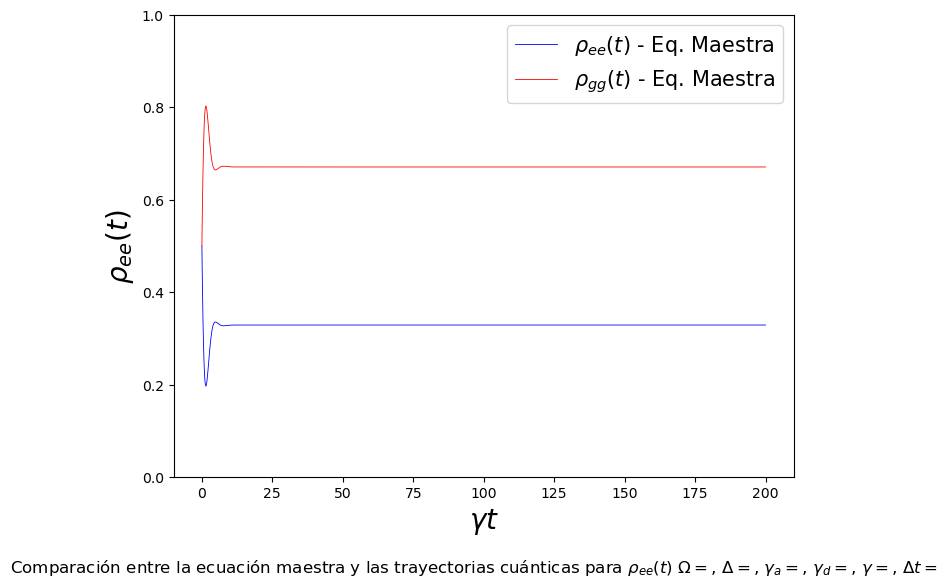

In [152]:
plt.figure(figsize=(8,6))

# Resultados de la ecuación maestra
plt.plot(tlist,result.expect[1], label=r'$\rho_{ee}(t)$ - Eq. Maestra', linestyle='-', linewidth=0.6, color='blue')
plt.plot(tlist,result.expect[0], label=r'$\rho_{gg}(t)$ - Eq. Maestra', linestyle='-', linewidth=0.6, color='red')


# Etiquetas de los ejes
plt.xlabel(r'$\gamma t$', fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$', fontsize=20)

# Límites de los ejes
plt.ylim(0, 1)

# Leyenda
plt.legend(loc=1, prop={'size': 15})

# Texto adicional en la gráfica
plt.figtext(0.5, -0.05, 
            r'Comparación entre la ecuación maestra y las trayectorias cuánticas para $\rho_{ee}(t)$ '
            r'$\Omega = %.2f$, $\Delta = %.2f$, $\gamma_a = %.2f$, $\gamma_d = %.2f$, $\gamma = %.2f$, $\Delta t = %i$', 
            ha='center', fontsize=12)

# Guardar la figura
#plt.savefig('Comparacion_EqMaestra_Trayectorias.pdf')

# Mostrar la figura
plt.show()

# Espectro con triplete de mollow

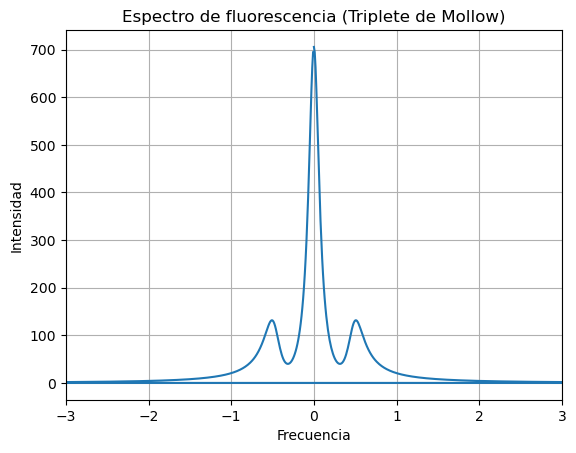

In [13]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
g = 1.0       # Tasa de decaimiento
Omega = 3.0   # Frecuencia de Rabi
Delta = 0   # Desintonización
t_max = 40.0  # Tiempo total de simulación
dt = 0.01     # Paso de tiempo
tlist = np.linspace(0, t_max, int(t_max / dt))

# Definimos los estados base y excitado para un sistema de dos niveles
Kg = qt.basis(2, 0)  # estado base |g⟩
Ke = qt.basis(2, 1)  # estado excitado |e⟩

# Operadores cuánticos
sm = qt.destroy(2)   # Operador de aniquilación (sigma_-)
sp = sm.dag()        # Operador de creación (sigma_+)
sigma_z = qt.sigmaz()

# Hamiltoniano
H = 0.5 * Delta * sigma_z + 0.5 * Omega * (sm + sp)

# Operador de colapso
Ceg = np.sqrt(g) * sm
collapse = [Ceg]

# Estado inicial en superposición (importante para generar coherencia)
psi0 = (Kg + Ke).unit()

# Simulación de la dinámica
result = qt.mesolve(H, psi0, tlist, collapse, [sm.dag() * sm])

# Cálculo de la función de correlación de primer orden
tau_list = np.linspace(0, 100, 5000)  # Aumentamos el número de puntos y el rango de tau
G1 = qt.correlation_2op_1t(H, psi0, tau_list, collapse, sm.dag(), sm).real

# Transformada de Fourier para obtener el espectro
spectrum = np.fft.fft(G1)
freqs = np.fft.fftfreq(len(tau_list), d=tau_list[1] - tau_list[0])

# Graficar el espectro
plt.figure()
plt.plot(freqs, np.abs(spectrum)**2)
plt.xlabel('Frecuencia')
plt.ylabel('Intensidad')
plt.title('Espectro de fluorescencia (Triplete de Mollow)')
plt.xlim(-Omega , Omega)  # Ajustar el rango de frecuencias
plt.grid()
plt.show()

# Espectro dependiente de la frecuencia de rabi

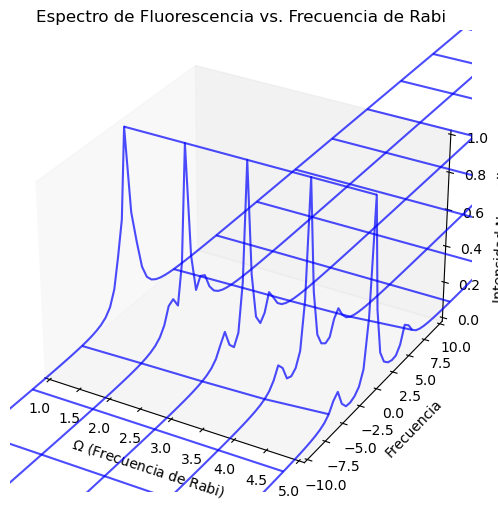

In [131]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
g = 1.0       # Tasa de decaimiento
Delta = 0.0   # Desintonización
t_max = 40.0  # Tiempo total de simulación
dt = 0.01     # Paso de tiempo
tlist = np.linspace(0, t_max, int(t_max / dt))

# Valores de Omega (frecuencia de Rabi)
Omega_values = np.linspace(1.0, 5.0, 5)  # 10 valores entre 1 y 5
tau_list = np.linspace(0, 10, 500)  # Tau para calcular correlación

# Matriz para almacenar los espectros
spectra = []

# Iterar sobre diferentes valores de Omega
for Omega in Omega_values:
    # Definir operadores
    sm = qt.destroy(2)   # sigma_-
    sp = sm.dag()        # sigma_+
    sigma_z = qt.sigmaz()
    
    # Definir Hamiltoniano
    H = 0.5 * Delta * sigma_z + 0.5 * Omega * (sm + sp)
    
    # Operador de colapso
    collapse = [np.sqrt(g) * sm]

    # Estado inicial
    Kg = qt.basis(2, 0)
    Ke = qt.basis(2, 1)
    psi0 = (Kg + Ke).unit()

    # Calcular correlación de primer orden G1(τ)
    G1 = qt.correlation_2op_1t(H, psi0, tau_list, collapse, sm.dag(), sm).real
    
    # Transformada de Fourier
    spectrum = np.fft.fftshift(np.fft.fft(G1))  # FFT centrada
    freqs = np.fft.fftshift(np.fft.fftfreq(len(tau_list), d=tau_list[1] - tau_list[0])) * 2 * np.pi

    # Normalizar intensidad y guardar
    spectra.append(np.abs(spectrum)**2 / np.max(np.abs(spectrum)**2))

# Convertir lista a matriz numpy
spectra = np.array(spectra)

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear malla de datos
Omega_grid, freq_grid = np.meshgrid(Omega_values, freqs)

# Dibujar superficie mejorada
ax.plot_wireframe(Omega_grid, freq_grid, spectra.T, color='blue', alpha=0.7)

# Ajustar límites de los ejes
ax.set_xlim([Omega_values.min(), Omega_values.max()])
ax.set_ylim([-10, 10])  # Ajustamos mejor el límite de frecuencia
ax.set_zlim([0, 1])  # Intensidad normalizada

# Quitar malla de fondo
ax.grid(False)
# Etiquetas
ax.set_xlabel(r'$\Omega$ (Frecuencia de Rabi)')
ax.set_ylabel('Frecuencia')
ax.set_zlabel('Intensidad Normalizada')
ax.set_title('Espectro de Fluorescencia vs. Frecuencia de Rabi')

plt.show()



NameError: name 'Agg' is not defined